<a href="https://colab.research.google.com/github/Rabelani1027/Machine_Learning/blob/main/Language_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

Importing libraries for viewing the data and modelling

In [ ]:
import pandas as pd
import numpy as np
import spacy
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer as cv
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

Loading the train and test data

In [ ]:
train = pd.read_csv('train_set.csv')
train_2 = train.copy()

In [ ]:
test = pd.read_csv('test_set.csv')

Viewing the first 5 rows of the training and testing dataset

In [ ]:
train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [ ]:
test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


Checking if there are null values in the dataset

In [ ]:
train.isna().sum()

lang_id    0
text       0
dtype: int64

In [ ]:
test.isna().sum()

index    0
text     0
dtype: int64

Taking a look at the languages present in the data set

In [ ]:
train['lang_id'].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

This dataset contains 11 languages with 3000 sentences from each language. This is a very balanced dataset with no missing values, so we can say this dataset is completely ready to be used to train a machine learning model.

# Exploratory Data Analysis (EDA)

EDA Preprocessing

In [ ]:
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])
# Lemmatization with stopwords removal
train_2['lemmatized']=train_2['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


In [ ]:
df_grouped=train_2[['lang_id','lemmatized']].groupby(by='lang_id').agg(lambda x:' '.join(x))
df_grouped.head()


,lemmatized
lang_id,
afr,n persoon wat wil vasstel hulle meet miv geïnf...
eng,province kwazulu - natal department transport ...
nbl,lapho inarha yangeqadi ingenwe ngokungasimthet...
nso,o netefatša gore o ba file dilo ka moka tše le...
sot,ka ho mengwa lefapheng la lona diprofeshenale ...


In [ ]:

cv= CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(12)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aabameli,aaent,aak,aan,aanbeveel,aanbevele,aanbeveling,aanbevole,aanbie,...,ṱuwa,ṱuwe,ṱuwedza,ṱuwedzi,ṱuṱuwedza,ṱuṱuwedzaho,ṱuṱuwedze,ṱuṱuwedzea,ṱuṱuwedzwa,ṱuṱuwedzwe
lang_id,,,,,,,,,,,,,,,,,,,,,
afr,3,0,0,2,901,5,3,7,1,8,...,0,0,0,0,0,0,0,0,0,0
eng,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nbl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nso,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sot,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ssw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tsn,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
tso,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ven,1,0,0,0,0,0,0,0,0,0,...,5,2,1,1,29,1,2,1,8,1


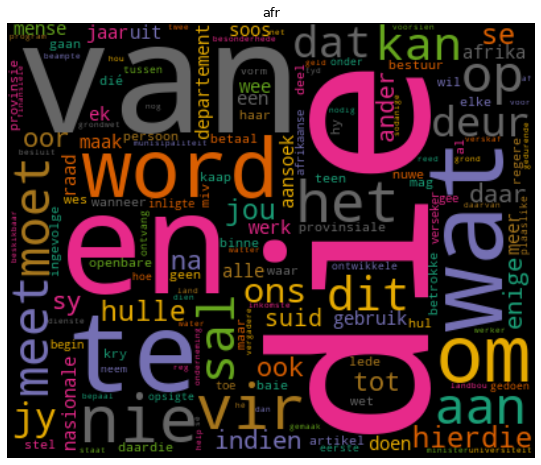

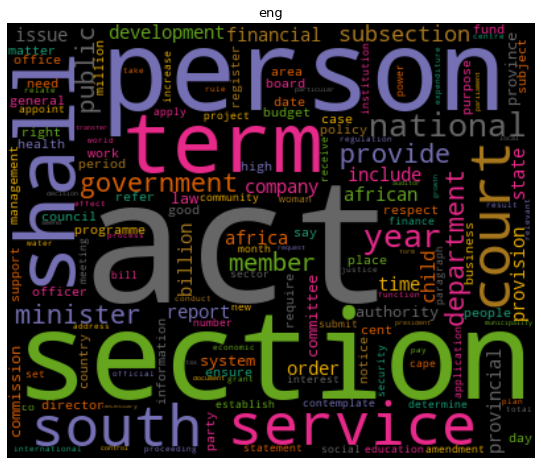

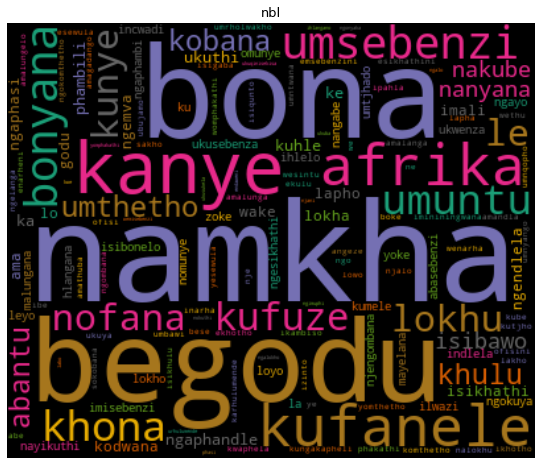

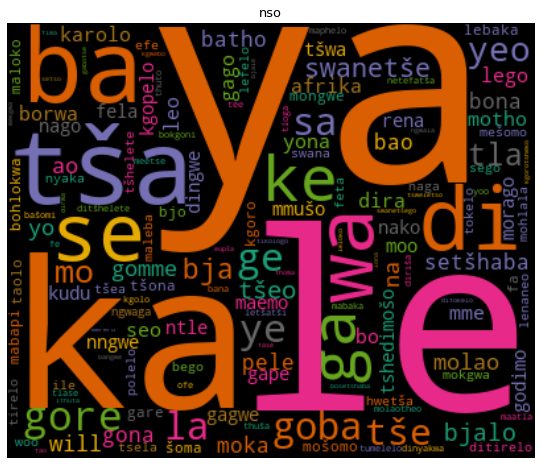

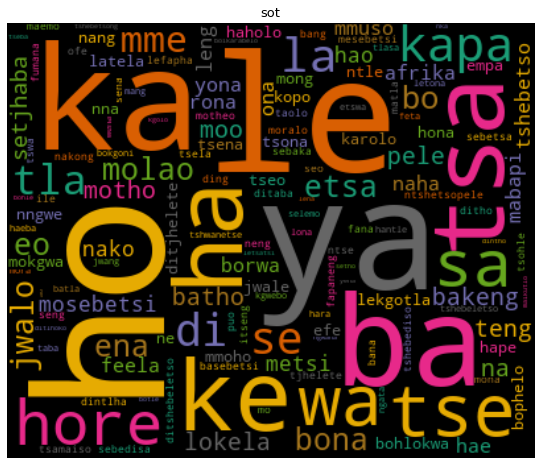

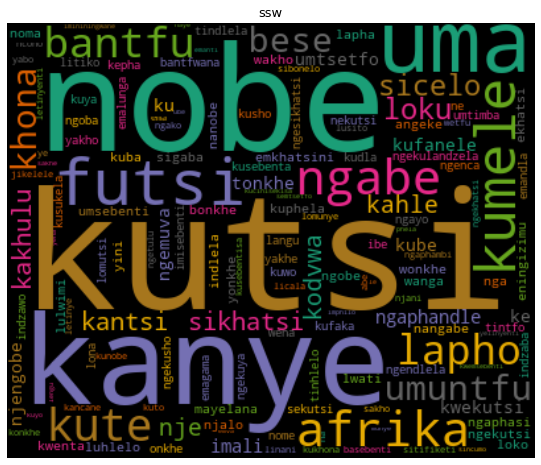

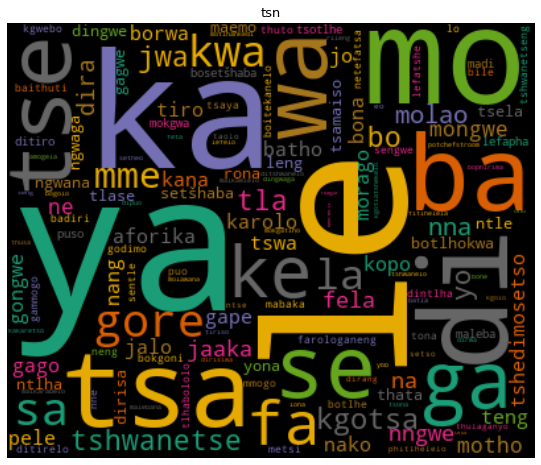

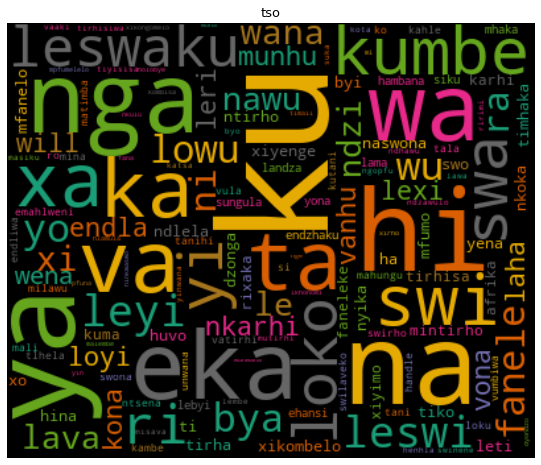

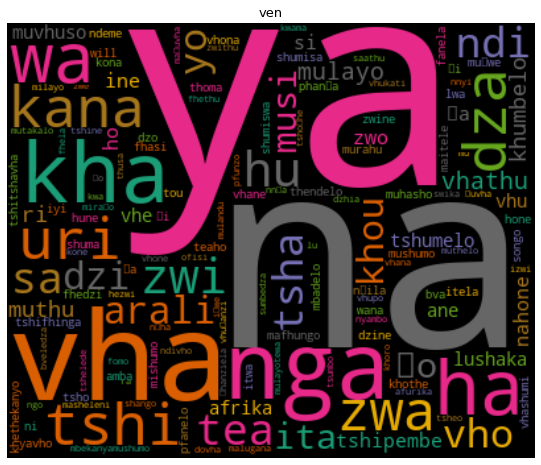

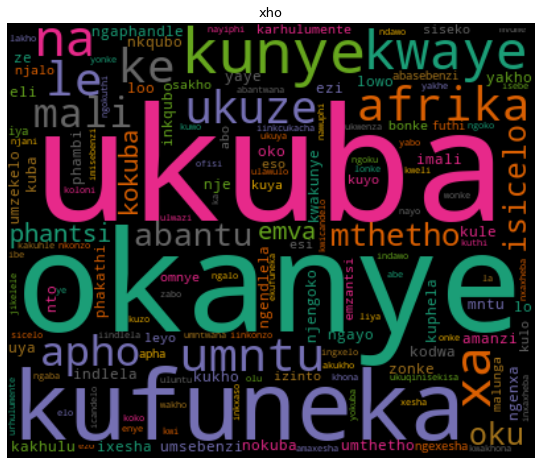

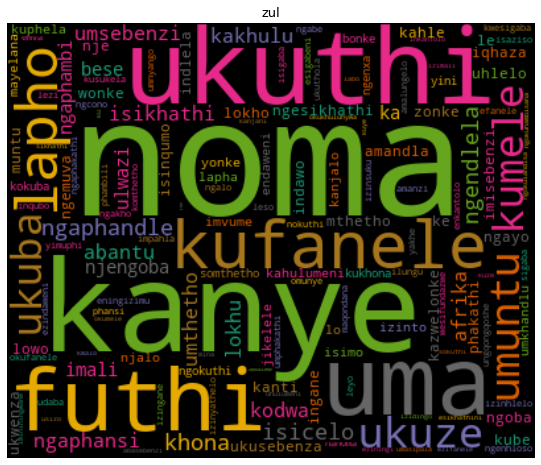

In [ ]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap
# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
# Transposing document term matrix
df_dtm=df_dtm.transpose()
# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)


# Language Detection Model

Now let’s split the data into training and test sets:



In [ ]:
x = np.array(train["text"])
y = np.array(train["lang_id"])

cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [ ]:
faiza = cv.transform(test['text'])

As this is a problem of multiclass classification, so I will be using the Multinomial Naïve Bayes algorithm to train the language detection model as this algorithm always performs very well on the problems based on multiclass classification:



In [ ]:
model = MultinomialNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9992653810835629

In [ ]:
pred_test = model.predict(faiza)
result_tmod = pd.DataFrame(pred_test, columns=['lang_id'])
result_tmod.head()
output = pd.DataFrame({"index":test['index']})
submission = output.join(result_tmod)
submission.to_csv("submission.csv", index = False)